In [16]:
import pandas as pd
base = pd.read_csv('original.csv')
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
base.shape

(21613, 21)

In [23]:
x = base.iloc[:, 5].values
x=x.reshape(-1,1)

In [24]:
x.shape

(21613, 1)

In [25]:
y = base.iloc[:, 2:3].values

In [27]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x= scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y= scaler_y.fit_transform(y)

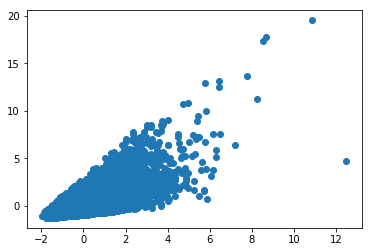

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

y = b0 + b1 * x

In [30]:
import numpy as np
np.random.seed(1)
np.random.seed(2)

In [31]:
import tensorflow as tf

In [33]:
b0=tf.Variable(0.41)
b1=tf.Variable(0.72)
batch_size = 32
xph= tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size,1])

In [37]:
y_modelo = b0 + b1 * xph
erro = tf.losses.mean_squared_error(yph, y_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento=otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(100000):
        indices = np.random.randint(len(x), size=batch_size)
        feed = {xph: x[indices], yph: y[indices]}
        sess.run(treinamento, feed_dict = feed)
    b0_final, b1_final = sess.run([b0,b1])

In [41]:
b0_final

-0.005567049

In [42]:
b1_final

0.6927595

In [43]:
previsoes = b0_final + b1_final *x

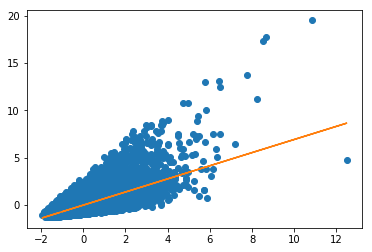

In [44]:
plt.plot(x,y,'o')
plt.plot(x, previsoes)

In [45]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [48]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y1,previsoes1)
print(mae)

0.47108585519598484
